### Lab-04_1: Multivariable Linear regression

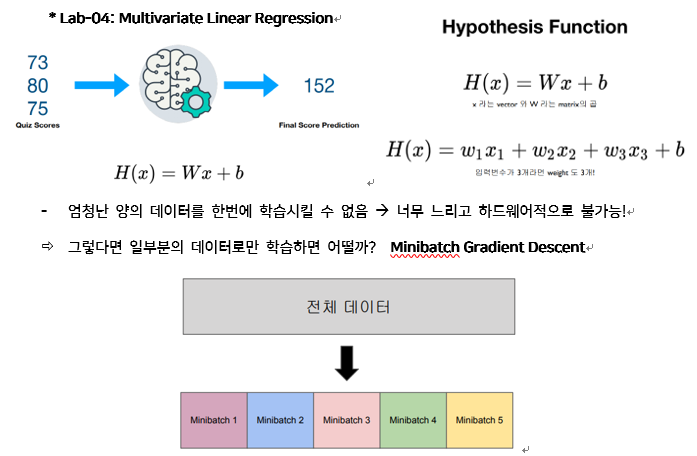

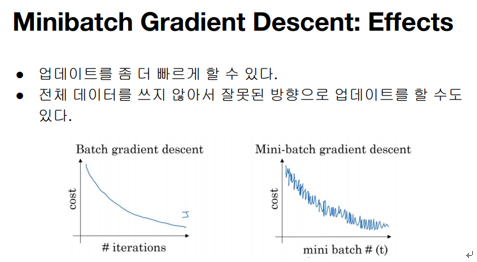

In [ ]:
## Full Code with torch.optim

import torch
import torch.optim as optim

# 데이터
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

# 모델 초기화
W = torch.zeros((3,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer 설정
optimizer = optim.SGD([W, b], lr=1e-5)

nb_epochs = 20
for epoch in range(nb_epochs + 1):

  # H(x) 계산
  hypothesis = x_train.matmul(W) + b # or .mm or @

  # cost 계산
  cost = torch.mean((hypothesis - y_train) ** 2)

  # cost로 H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  print('Epoch {:4d}/{} hypothesis: {} Cost: {:.6f}'.format(
      epoch, nb_epochs, hypothesis.squeeze().detach(), cost.item()
      ))
  
# 점점 작아지는 Cost
# 점점 y에 가까워지는 H(x)
# Learning rate에 따라 발산할수도!

Epoch    0/20 hypothesis: tensor([0., 0., 0., 0., 0.]) Cost: 29661.800781
Epoch    1/20 hypothesis: tensor([67.2578, 80.8397, 79.6523, 86.7394, 61.6605]) Cost: 9298.520508
Epoch    2/20 hypothesis: tensor([104.9128, 126.0990, 124.2466, 135.3015,  96.1821]) Cost: 2915.712402
Epoch    3/20 hypothesis: tensor([125.9942, 151.4381, 149.2133, 162.4896, 115.5097]) Cost: 915.040527
Epoch    4/20 hypothesis: tensor([137.7967, 165.6247, 163.1911, 177.7112, 126.3307]) Cost: 287.936096
Epoch    5/20 hypothesis: tensor([144.4044, 173.5674, 171.0168, 186.2332, 132.3891]) Cost: 91.371063
Epoch    6/20 hypothesis: tensor([148.1035, 178.0143, 175.3980, 191.0042, 135.7812]) Cost: 29.758249
Epoch    7/20 hypothesis: tensor([150.1744, 180.5042, 177.8509, 193.6753, 137.6805]) Cost: 10.445267
Epoch    8/20 hypothesis: tensor([151.3336, 181.8983, 179.2240, 195.1707, 138.7440]) Cost: 4.391237
Epoch    9/20 hypothesis: tensor([151.9824, 182.6789, 179.9928, 196.0079, 139.3396]) Cost: 2.493121
Epoch   10/20 hypo

In [ ]:
## Full Code with torch.optim -> nn.Module 을 사용해보자!

import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

# 데이터
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

# 모델 초기화
#W = torch.zeros((3,1), requires_grad=True)
#b = torch.zeros(1, requires_grad=True)
model = MultivariateLinearRegressionModel()

# optimizer 설정
optimizer = optim.SGD([W, b], lr=1e-5)

nb_epochs = 20
for epoch in range(nb_epochs + 1):

  # H(x) 계산
  #hypothesis = x_train.matmul(W) + b # or .mm or @
  Hypothesis = model(x_train)

  # cost 계산
  #cost = torch.mean((hypothesis - y_train) ** 2)
  cost = F.mse_loss(prediction, y_train) ### prediction 자리에 무슨 코드?

  # cost로 H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  print('Epoch {:4d}/{} hypothesis: {} Cost: {:.6f}'.format(
      epoch, nb_epochs, hypothesis.squeeze().detach(), cost.item()
  ))

# nn.Module 을 상속해서 모델 생성
# nn.Linear(3, 1) -> 입력 차원: 3, 출력 차원: 1
# Hypothesis 계산은 forward()에서! Gradient 계산은 PyTorch가 알아서 해줌, backward()

class MultivariateLinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(3,1)

  def forward(self,x):
    return self.linear(x)

Epoch    0/20 hypothesis: tensor([-26.2309, -31.0008, -30.7627, -34.6094, -22.5181]) Cost: 35028.824219
Epoch    1/20 hypothesis: tensor([-26.2309, -31.0008, -30.7627, -34.6094, -22.5181]) Cost: 35028.824219
Epoch    2/20 hypothesis: tensor([-26.2309, -31.0008, -30.7627, -34.6094, -22.5181]) Cost: 35028.824219
Epoch    3/20 hypothesis: tensor([-26.2309, -31.0008, -30.7627, -34.6094, -22.5181]) Cost: 35028.824219
Epoch    4/20 hypothesis: tensor([-26.2309, -31.0008, -30.7627, -34.6094, -22.5181]) Cost: 35028.824219
Epoch    5/20 hypothesis: tensor([-26.2309, -31.0008, -30.7627, -34.6094, -22.5181]) Cost: 35028.824219
Epoch    6/20 hypothesis: tensor([-26.2309, -31.0008, -30.7627, -34.6094, -22.5181]) Cost: 35028.824219
Epoch    7/20 hypothesis: tensor([-26.2309, -31.0008, -30.7627, -34.6094, -22.5181]) Cost: 35028.824219
Epoch    8/20 hypothesis: tensor([-26.2309, -31.0008, -30.7627, -34.6094, -22.5181]) Cost: 35028.824219
Epoch    9/20 hypothesis: tensor([-26.2309, -31.0008, -30.7627, 

### Lab-04_2: Loading Data

In [ ]:
## PyTorch Dataset
from torch.utils.data import Dataset

class CustomDataset(Dataset):
  def __init__(self):
    self.x_data = [[73, 80, 75],
                   [93, 88, 93],
                   [89, 91, 90],
                   [96, 98, 100],
                   [73, 66, 70]]
    self.y_data = [[152], [185], [180], [196], [142]]
  
  def __len__(self): # 데이터셋의 총 데이터 수
    return len(self.x_data)

  def __getitem__(self, idx): # 해당 인덱스에 상응하는 입출력 데이터 반환
    x = torch.FloatTensor(self.x_data[idx])
    y = torch.FloatTensor(self.x_data[idx])
    
    return x, y

dataset = CustomDataset()


## PyTorch DataLoader
from torch.utils.data import DataLoader

dataloader = DataLoader(
    dataset,
    batch_size=2, # 각 minibatch의 크기, 통상적으로 2의 제곱수로 설정
    shuffle=True, # Epoch 마다 데이터셋을 섞어서, 데이터가 학습되는 순서를 바꿈
)

In [ ]:
## Full Code with Dataset and DataLoader

nb_epochs = 20
for epoch in range(nb_epochs + 1):
  for batch_idx, samples in enumerate(dataloader):
    x_train, y_train = samples

  # H(x) 계산
  prediction = model(x_train)

  # cost 계산
  cost = F.mse_loss(prediction, y_train) ### 여기서 어떤 문제?

  # cost로 H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  print('Epoch {:4d}/{} hypothesis: {} Cost: {:.6f}'.format(
      epoch, nb_epochs, hypothesis.squeeze().detach(), cost.item()
      ))


Epoch    0/20 hypothesis: tensor([-26.2309, -31.0008, -30.7627, -34.6094, -22.5181]) Cost: 11398.487305
Epoch    1/20 hypothesis: tensor([-26.2309, -31.0008, -30.7627, -34.6094, -22.5181]) Cost: 6245.286621
Epoch    2/20 hypothesis: tensor([-26.2309, -31.0008, -30.7627, -34.6094, -22.5181]) Cost: 11028.067383
Epoch    3/20 hypothesis: tensor([-26.2309, -31.0008, -30.7627, -34.6094, -22.5181]) Cost: 6245.286621
Epoch    4/20 hypothesis: tensor([-26.2309, -31.0008, -30.7627, -34.6094, -22.5181]) Cost: 11028.067383
Epoch    5/20 hypothesis: tensor([-26.2309, -31.0008, -30.7627, -34.6094, -22.5181]) Cost: 13378.527344
Epoch    6/20 hypothesis: tensor([-26.2309, -31.0008, -30.7627, -34.6094, -22.5181]) Cost: 8582.011719
Epoch    7/20 hypothesis: tensor([-26.2309, -31.0008, -30.7627, -34.6094, -22.5181]) Cost: 8582.011719
Epoch    8/20 hypothesis: tensor([-26.2309, -31.0008, -30.7627, -34.6094, -22.5181]) Cost: 13378.527344
Epoch    9/20 hypothesis: tensor([-26.2309, -31.0008, -30.7627, -34.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Using a target size (torch.Size([1, 3])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  if sys.path[0] == '':
